https://dschloe.github.io/python/python_edu/07_deeplearning/deep_learning_lstm/

https://velog.io/@cksdid5875/%ED%83%9C%EC%96%91%EA%B4%91-%EB%B0%9C%EC%A0%84%EB%9F%89-%EC%98%88%EC%B8%A1-%EB%AA%A8%EB%8D%B8

In [1]:
import os
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import matplotlib
matplotlib.rcParams['font.family'] ='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] =False

In [3]:
df = pd.read_csv('2022광양_시간별데이터.csv', encoding='cp949')
df

,일자,풍속,일사량,온도,습도,발전량
0,2022-01-01 1:00,0.7,NaN,-3.0,40.0,0.0
1,2022-01-01 2:00,0.3,NaN,-3.1,38.0,0.0
2,2022-01-01 3:00,0.6,NaN,-3.3,38.0,0.0
3,2022-01-01 4:00,0.2,NaN,-3.5,38.0,0.0
4,2022-01-01 5:00,0.0,NaN,-3.7,41.0,0.0
...,...,...,...,...,...,...
8754,2022-12-31 19:00,4.0,NaN,2.7,50.0,0.0
8755,2022-12-31 20:00,3.1,NaN,2.1,53.0,0.0
8756,2022-12-31 21:00,3.8,NaN,1.9,53.0,0.0
8757,2022-12-31 22:00,1.9,NaN,1.5,54.0,0.0


In [14]:
df.isnull().sum()

일자        0
풍속        0
일사량    3961
온도        0
습도        0
발전량       0
dtype: int64

In [15]:
df = df.fillna(0)

In [16]:
df.isnull().sum()

일자     0
풍속     0
일사량    0
온도     0
습도     0
발전량    0
dtype: int64

In [17]:
df = df.astype({'일자':'datetime64[ns]'})

In [18]:
df

,일자,풍속,일사량,온도,습도,발전량
0,2022-01-01 01:00:00,0.7,0.0,-3.0,40.0,0.0
1,2022-01-01 02:00:00,0.3,0.0,-3.1,38.0,0.0
2,2022-01-01 03:00:00,0.6,0.0,-3.3,38.0,0.0
3,2022-01-01 04:00:00,0.2,0.0,-3.5,38.0,0.0
4,2022-01-01 05:00:00,0.0,0.0,-3.7,41.0,0.0
...,...,...,...,...,...,...
8754,2022-12-31 19:00:00,4.0,0.0,2.7,50.0,0.0
8755,2022-12-31 20:00:00,3.1,0.0,2.1,53.0,0.0
8756,2022-12-31 21:00:00,3.8,0.0,1.9,53.0,0.0
8757,2022-12-31 22:00:00,1.9,0.0,1.5,54.0,0.0


c:\Users\com\anaconda3\envs\multi\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\com\anaconda3\envs\multi\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\com\anaconda3\envs\multi\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\com\anaconda3\envs\multi\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN 

Text(0, 0.5, '발전량')

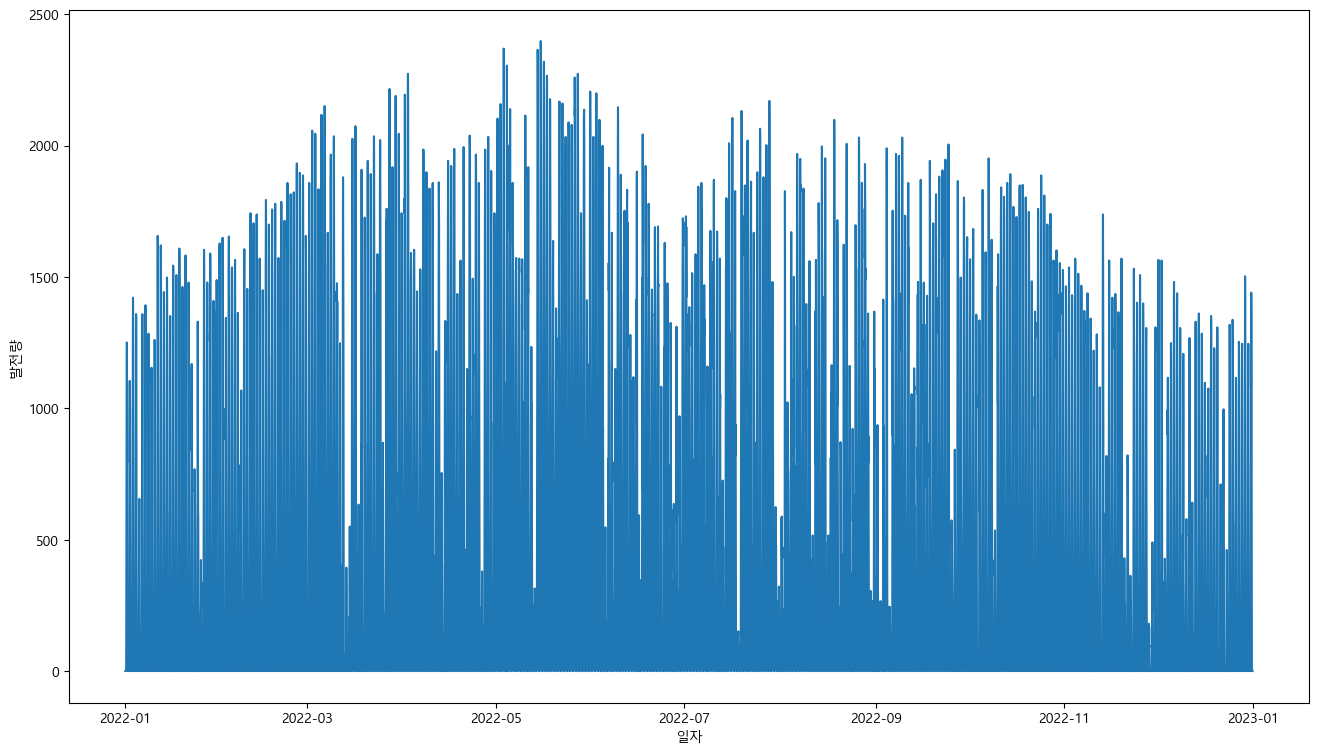

In [19]:
# 데이터 시각화
plt.figure(figsize=(16, 9))
sns.lineplot(y=df['발전량'], x=df['일자'])
plt.xlabel('일자')
plt.ylabel('발전량')

In [20]:
df['시간'] = df['일자'].dt.hour 

In [21]:
# 정규화
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
X = df[['풍속', '일사량', '온도', '습도', '발전량', '시간']]
df_scaled = sc.fit_transform(X)
df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns = ['풍속', '일사량', '온도', '습도', '발전량', '시간']

df_scaled

,풍속,일사량,온도,습도,발전량,시간
0,0.073684,0.0,0.107317,0.347826,0.0,0.043478
1,0.031579,0.0,0.104878,0.326087,0.0,0.086957
2,0.063158,0.0,0.100000,0.326087,0.0,0.130435
3,0.021053,0.0,0.095122,0.326087,0.0,0.173913
4,0.000000,0.0,0.090244,0.358696,0.0,0.217391
...,...,...,...,...,...,...
8754,0.421053,0.0,0.246341,0.456522,0.0,0.826087
8755,0.326316,0.0,0.231707,0.489130,0.0,0.869565
8756,0.400000,0.0,0.226829,0.489130,0.0,0.913043
8757,0.200000,0.0,0.217073,0.500000,0.0,0.956522


In [22]:
TEST_SIZE = int(8759*0.3)+720
WINDOW_SIZE = 6130

train = df_scaled[:-TEST_SIZE]
test = df_scaled[-TEST_SIZE:]

In [23]:
test

,풍속,일사량,온도,습도,발전량,시간
5412,0.336842,0.697128,0.978049,0.630435,0.832833,0.565217
5413,0.463158,0.801567,0.985366,0.597826,0.827828,0.608696
5414,0.368421,0.608355,0.968293,0.630435,0.670671,0.652174
5415,0.305263,0.577023,0.982927,0.597826,0.656657,0.695652
5416,0.389474,0.399478,0.960976,0.630435,0.467467,0.739130
...,...,...,...,...,...,...
8754,0.421053,0.000000,0.246341,0.456522,0.000000,0.826087
8755,0.326316,0.000000,0.231707,0.489130,0.000000,0.869565
8756,0.400000,0.000000,0.226829,0.489130,0.000000,0.913043
8757,0.200000,0.000000,0.217073,0.500000,0.000000,0.956522


In [24]:
def make_dataset(data, label, window_size):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size]))
    return np.array(feature_list), np.array(label_list)

In [25]:
from sklearn.model_selection import train_test_split

feature_cols = ['풍속', '일사량', '온도', '습도', '시간']
label_cols = ['발전량']

train_feature = train[feature_cols]
train_label = train[label_cols]

train_feature, train_label = make_dataset(train_feature, train_label, 720)

x_train, x_valid, y_train, y_valid = train_test_split(train_feature, train_label, test_size=0.3)
x_train.shape, x_valid.shape

((3284, 720, 5), (1408, 720, 5))

In [26]:
test_feature = test[feature_cols]
test_label = test[label_cols]

test_feature.shape, test_label.shape

((3347, 5), (3347, 1))

In [27]:
test_feature, test_label = make_dataset(test_feature, test_label, 720)
test_feature.shape, test_label.shape

((2627, 720, 5), (2627, 1))

In [28]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import LSTM

In [29]:
# lstm 모델 제작
model = Sequential()
model.add(LSTM(16, 
               input_shape=(train_feature.shape[1], train_feature.shape[2]), 
               activation='relu', 
               return_sequences=False)
          )

model.add(Dense(1))

In [30]:
# 모델 학습
model.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='val_loss', patience=5)

model_path = 'model'
filename = os.path.join(model_path, 'tmp_checkpoint.h5')
checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

history = model.fit(x_train, y_train, 
                                    epochs=100, 
                                    batch_size=8,
                                    validation_data=(x_valid, y_valid), 
                                    callbacks=[early_stop, checkpoint])

Epoch 1/100
411/411 [==============================] - ETA: 0s - loss: 0.0402
Epoch 1: val_loss improved from inf to 0.01777, saving model to model\tmp_checkpoint.h5
411/411 [==============================] - 92s 218ms/step - loss: 0.0402 - val_loss: 0.0178
Epoch 2/100
411/411 [==============================] - ETA: 0s - loss: 0.0129
Epoch 2: val_loss improved from 0.01777 to 0.00900, saving model to model\tmp_checkpoint.h5
411/411 [==============================] - 89s 216ms/step - loss: 0.0129 - val_loss: 0.0090
Epoch 3/100
411/411 [==============================] - ETA: 0s - loss: 0.0088
Epoch 3: val_loss improved from 0.00900 to 0.00835, saving model to model\tmp_checkpoint.h5
411/411 [==============================] - 89s 218ms/step - loss: 0.0088 - val_loss: 0.0084
Epoch 4/100
411/411 [==============================] - ETA: 0s - loss: 0.0078
Epoch 4: val_loss improved from 0.00835 to 0.00726, saving model to model\tmp_checkpoint.h5
411/411 [==============================] - 89s 2

In [31]:
# 학습된 모델을 이용하여 예측량 구하기
model.load_weights(filename)
pred = model.predict(test_feature)

pred

83/83 [==============================] - 4s 46ms/step


array([[ 0.45416728],
       [ 0.4057267 ],
       [ 0.24901576],
       ...,
       [-0.00891383],
       [-0.00533457],
       [ 0.00278486]], dtype=float32)

In [32]:
# 예측량 데이터를 데이터 프레임 형태로 변환
pred_scaled = pd.DataFrame(pred)

pred_scaled

,0
0,0.454167
1,0.405727
2,0.249016
3,0.190873
4,0.137486
...,...
2622,-0.025151
2623,-0.012808
2624,-0.008914
2625,-0.005335


In [33]:
pred_scaled.to_csv('pred.csv', index=False)

In [46]:
pred_sc = pd.read_csv('pred.csv', encoding='cp949')
pred_sc

,발전량
0,0.454167
1,0.405727
2,0.249016
3,0.190873
4,0.137486
...,...
2622,-0.025151
2623,-0.012808
2624,-0.008914
2625,-0.005335


In [47]:
sliced_df = df.iloc[-2627:]
sliced_df

,일자,풍속,일사량,온도,습도,발전량,시간
6132,2022-09-13 13:00:00,3.5,1.54,27.4,69.0,926.4,13
6133,2022-09-13 14:00:00,2.7,0.92,26.9,72.0,600.0,14
6134,2022-09-13 15:00:00,3.9,0.88,27.0,72.0,628.8,15
6135,2022-09-13 16:00:00,4.6,0.83,26.8,72.0,518.4,16
6136,2022-09-13 17:00:00,3.6,0.37,26.4,70.0,259.2,17
...,...,...,...,...,...,...,...
8754,2022-12-31 19:00:00,4.0,0.00,2.7,50.0,0.0,19
8755,2022-12-31 20:00:00,3.1,0.00,2.1,53.0,0.0,20
8756,2022-12-31 21:00:00,3.8,0.00,1.9,53.0,0.0,21
8757,2022-12-31 22:00:00,1.9,0.00,1.5,54.0,0.0,22


In [48]:
sliced_df.reset_index(drop=True, inplace=True)
sliced_df

,일자,풍속,일사량,온도,습도,발전량,시간
0,2022-09-13 13:00:00,3.5,1.54,27.4,69.0,926.4,13
1,2022-09-13 14:00:00,2.7,0.92,26.9,72.0,600.0,14
2,2022-09-13 15:00:00,3.9,0.88,27.0,72.0,628.8,15
3,2022-09-13 16:00:00,4.6,0.83,26.8,72.0,518.4,16
4,2022-09-13 17:00:00,3.6,0.37,26.4,70.0,259.2,17
...,...,...,...,...,...,...,...
2622,2022-12-31 19:00:00,4.0,0.00,2.7,50.0,0.0,19
2623,2022-12-31 20:00:00,3.1,0.00,2.1,53.0,0.0,20
2624,2022-12-31 21:00:00,3.8,0.00,1.9,53.0,0.0,21
2625,2022-12-31 22:00:00,1.9,0.00,1.5,54.0,0.0,22


In [49]:
a = df_scaled.iloc[-2627:]
a.reset_index(drop=True, inplace=True)
a = a.drop(['발전량'],axis=1)
a

,풍속,일사량,온도,습도,시간
0,0.368421,0.402089,0.848780,0.663043,0.565217
1,0.284211,0.240209,0.836585,0.695652,0.608696
2,0.410526,0.229765,0.839024,0.695652,0.652174
3,0.484211,0.216710,0.834146,0.695652,0.695652
4,0.378947,0.096606,0.824390,0.673913,0.739130
...,...,...,...,...,...
2622,0.421053,0.000000,0.246341,0.456522,0.826087
2623,0.326316,0.000000,0.231707,0.489130,0.869565
2624,0.400000,0.000000,0.226829,0.489130,0.913043
2625,0.200000,0.000000,0.217073,0.500000,0.956522


In [50]:
pred_sc

,발전량
0,0.454167
1,0.405727
2,0.249016
3,0.190873
4,0.137486
...,...
2622,-0.025151
2623,-0.012808
2624,-0.008914
2625,-0.005335


In [51]:
pred_sc1 = pd.concat([a,pred_sc], axis=1)
pred_sc1

,풍속,일사량,온도,습도,시간,발전량
0,0.368421,0.402089,0.848780,0.663043,0.565217,0.454167
1,0.284211,0.240209,0.836585,0.695652,0.608696,0.405727
2,0.410526,0.229765,0.839024,0.695652,0.652174,0.249016
3,0.484211,0.216710,0.834146,0.695652,0.695652,0.190873
4,0.378947,0.096606,0.824390,0.673913,0.739130,0.137486
...,...,...,...,...,...,...
2622,0.421053,0.000000,0.246341,0.456522,0.826087,-0.025151
2623,0.326316,0.000000,0.231707,0.489130,0.869565,-0.012808
2624,0.400000,0.000000,0.226829,0.489130,0.913043,-0.008914
2625,0.200000,0.000000,0.217073,0.500000,0.956522,-0.005335


In [52]:
pred_sc1 = pd.concat([a,pred_sc], axis=1)
pred_sc1 = pred_sc1.reindex(['풍속', '일사량', '온도', '습도', '발전량', '시간'], axis=1)
pred_sc1

,풍속,일사량,온도,습도,발전량,시간
0,0.368421,0.402089,0.848780,0.663043,0.454167,0.565217
1,0.284211,0.240209,0.836585,0.695652,0.405727,0.608696
2,0.410526,0.229765,0.839024,0.695652,0.249016,0.652174
3,0.484211,0.216710,0.834146,0.695652,0.190873,0.695652
4,0.378947,0.096606,0.824390,0.673913,0.137486,0.739130
...,...,...,...,...,...,...
2622,0.421053,0.000000,0.246341,0.456522,-0.025151,0.826087
2623,0.326316,0.000000,0.231707,0.489130,-0.012808,0.869565
2624,0.400000,0.000000,0.226829,0.489130,-0.008914,0.913043
2625,0.200000,0.000000,0.217073,0.500000,-0.005335,0.956522


In [53]:
# 역정규화
rescaled_pred = sc.inverse_transform(pred_sc1)
rescaled_pred = pd.DataFrame(rescaled_pred)
rescaled_pred.columns = ['풍속', '일사량', '온도', '습도', '발전량', '시간']
rescaled_pred

,풍속,일사량,온도,습도,발전량,시간
0,3.5,1.54,27.4,69.0,1088.911471,13.0
1,2.7,0.92,26.9,72.0,972.770336,14.0
2,3.9,0.88,27.0,72.0,597.040186,15.0
3,4.6,0.83,26.8,72.0,457.638280,16.0
4,3.6,0.37,26.4,70.0,329.637560,17.0
...,...,...,...,...,...,...
2622,4.0,0.00,2.7,50.0,-60.301040,19.0
2623,3.1,0.00,2.1,53.0,-30.709633,20.0
2624,3.8,0.00,1.9,53.0,-21.371804,21.0
2625,1.9,0.00,1.5,54.0,-12.790172,22.0


In [54]:
concat_df = pd.concat([sliced_df['일자'], rescaled_pred],axis=1)

concat_df

,일자,풍속,일사량,온도,습도,발전량,시간
0,2022-09-13 13:00:00,3.5,1.54,27.4,69.0,1088.911471,13.0
1,2022-09-13 14:00:00,2.7,0.92,26.9,72.0,972.770336,14.0
2,2022-09-13 15:00:00,3.9,0.88,27.0,72.0,597.040186,15.0
3,2022-09-13 16:00:00,4.6,0.83,26.8,72.0,457.638280,16.0
4,2022-09-13 17:00:00,3.6,0.37,26.4,70.0,329.637560,17.0
...,...,...,...,...,...,...,...
2622,2022-12-31 19:00:00,4.0,0.00,2.7,50.0,-60.301040,19.0
2623,2022-12-31 20:00:00,3.1,0.00,2.1,53.0,-30.709633,20.0
2624,2022-12-31 21:00:00,3.8,0.00,1.9,53.0,-21.371804,21.0
2625,2022-12-31 22:00:00,1.9,0.00,1.5,54.0,-12.790172,22.0


c:\Users\com\anaconda3\envs\multi\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\com\anaconda3\envs\multi\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\com\anaconda3\envs\multi\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\com\anaconda3\envs\multi\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN 

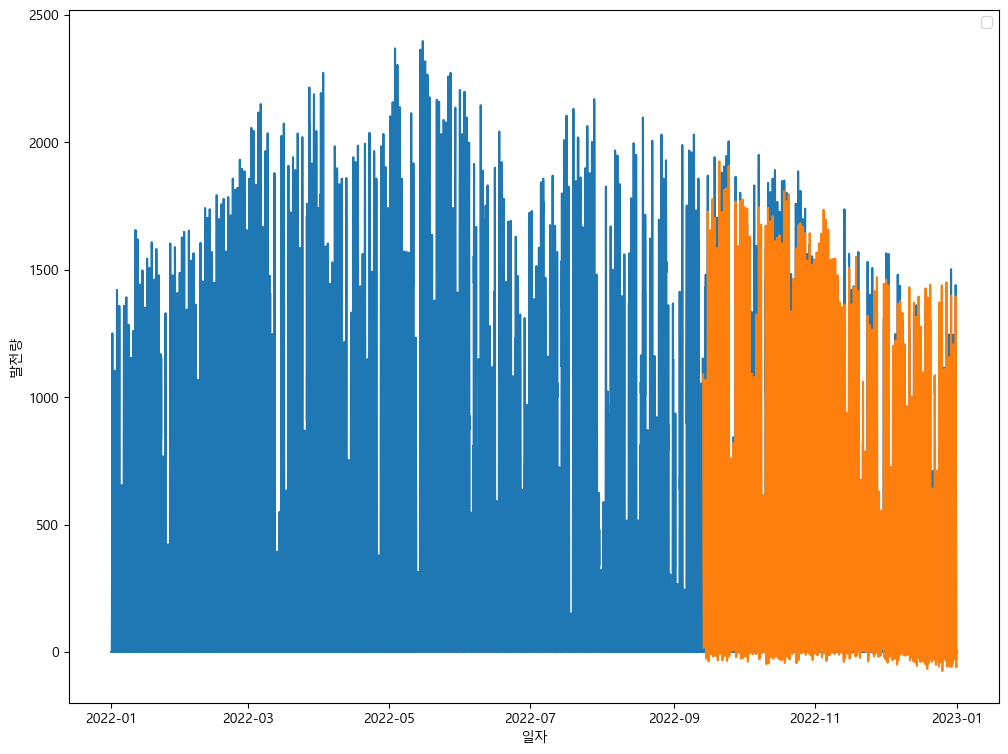

In [55]:
# 실제 데이터와 예측한 데이터 시각화
plt.figure(figsize=(12, 9))
sns.lineplot(y=df['발전량'], x=df['일자'])
sns.lineplot(y=concat_df['발전량'], x=concat_df['일자'])
plt.legend()
plt.show()

In [56]:
d = sc.fit_transform(X)
print(np.mean(np.square(d[-2627:]-pred_sc1)))

0.0005823076300971953


In [57]:
concat_df.rename(columns = {'일자' : 'Datetime'}, inplace = True)

concat_df = concat_df.set_index('Datetime')
concat_df.index = pd.to_datetime(concat_df.index,
                         infer_datetime_format = True)
concat_df

C:\Users\com\AppData\Local\Temp\ipykernel_20092\1257646459.py:4: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  concat_df.index = pd.to_datetime(concat_df.index,


,풍속,일사량,온도,습도,발전량,시간
Datetime,,,,,,
2022-09-13 13:00:00,3.5,1.54,27.4,69.0,1088.911471,13.0
2022-09-13 14:00:00,2.7,0.92,26.9,72.0,972.770336,14.0
2022-09-13 15:00:00,3.9,0.88,27.0,72.0,597.040186,15.0
2022-09-13 16:00:00,4.6,0.83,26.8,72.0,457.638280,16.0
2022-09-13 17:00:00,3.6,0.37,26.4,70.0,329.637560,17.0
...,...,...,...,...,...,...
2022-12-31 19:00:00,4.0,0.00,2.7,50.0,-60.301040,19.0
2022-12-31 20:00:00,3.1,0.00,2.1,53.0,-30.709633,20.0
2022-12-31 21:00:00,3.8,0.00,1.9,53.0,-21.371804,21.0


In [58]:
df.rename(columns = {'일자' : 'Datetime'}, inplace = True)

df = df.set_index('Datetime')
df.index = pd.to_datetime(df.index,
                         infer_datetime_format = True)
df

C:\Users\com\AppData\Local\Temp\ipykernel_20092\3399587861.py:4: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df.index = pd.to_datetime(df.index,


,풍속,일사량,온도,습도,발전량,시간
Datetime,,,,,,
2022-01-01 01:00:00,0.7,0.0,-3.0,40.0,0.0,1
2022-01-01 02:00:00,0.3,0.0,-3.1,38.0,0.0,2
2022-01-01 03:00:00,0.6,0.0,-3.3,38.0,0.0,3
2022-01-01 04:00:00,0.2,0.0,-3.5,38.0,0.0,4
2022-01-01 05:00:00,0.0,0.0,-3.7,41.0,0.0,5
...,...,...,...,...,...,...
2022-12-31 19:00:00,4.0,0.0,2.7,50.0,0.0,19
2022-12-31 20:00:00,3.1,0.0,2.1,53.0,0.0,20
2022-12-31 21:00:00,3.8,0.0,1.9,53.0,0.0,21


c:\Users\com\anaconda3\envs\multi\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\com\anaconda3\envs\multi\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\com\anaconda3\envs\multi\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\com\anaconda3\envs\multi\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN 

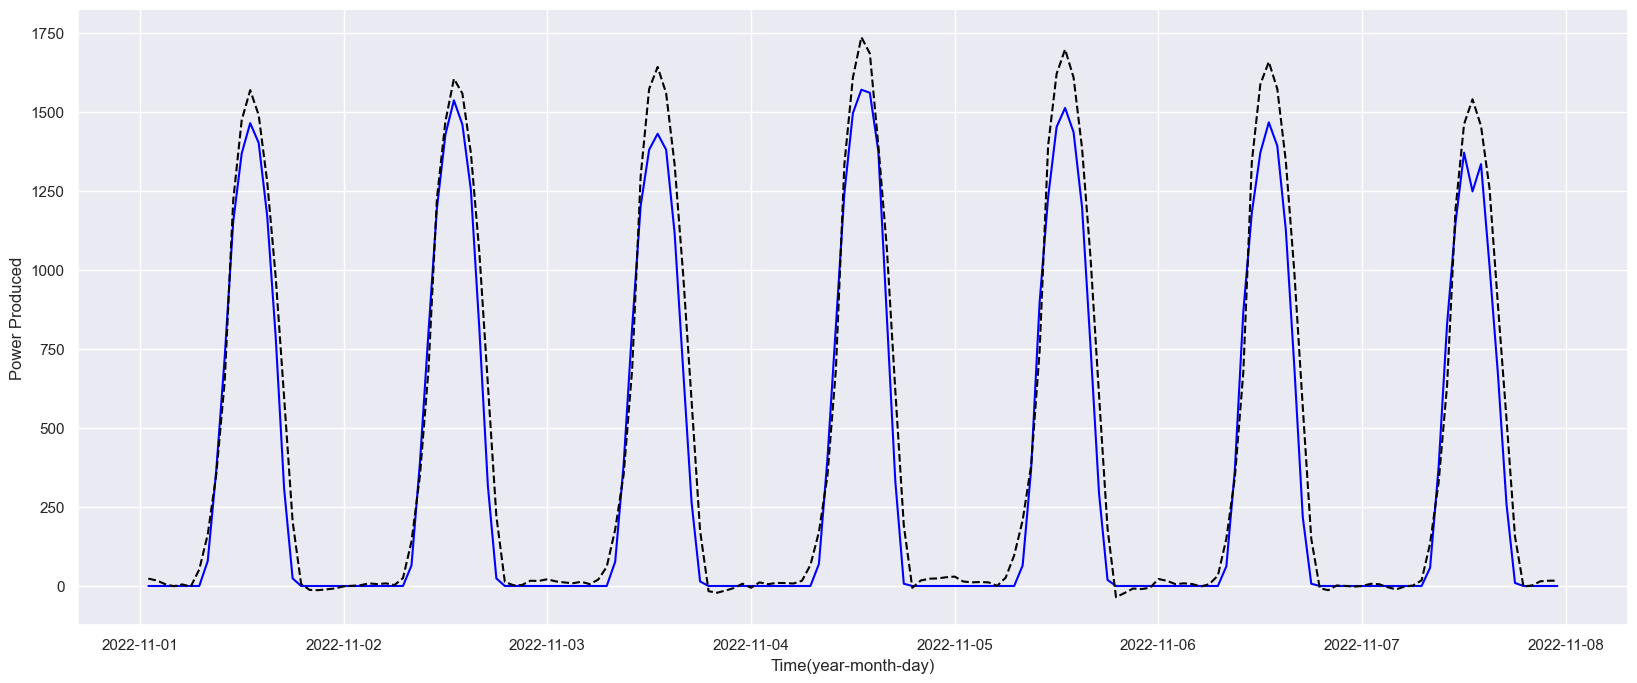

In [59]:
 # 11월 첫 주의 데이터 예측량과 실제값 시각화
ac = df.loc[(df.index > '2022-11-01') & (df.index < '2022-11-08')]
pr = concat_df.loc[(concat_df.index > '2022-11-01') & (concat_df.index < '2022-11-08')]


# Plotting
sns.set()
plt.figure(figsize=(20, 8))
sns.lineplot(data = ac, x = ac.index, y='발전량', color = 'blue') # actual values
sns.lineplot(data = pr, x = pr.index, y = '발전량', color = 'black', linestyle = 'dashed') # predicted values
plt.ylabel('Power Produced')
plt.xlabel('Time(year-month-day)')
plt.show()

In [60]:
df.loc[(test_copy.index > '2022-11-12') & (test_copy.index < '2022-11-17'), ('SystemProduction', 'predictions')]


NameError: name 'test_copy' is not defined

In [61]:
df[-2627:]

,풍속,일사량,온도,습도,발전량,시간
Datetime,,,,,,
2022-09-13 13:00:00,3.5,1.54,27.4,69.0,926.4,13
2022-09-13 14:00:00,2.7,0.92,26.9,72.0,600.0,14
2022-09-13 15:00:00,3.9,0.88,27.0,72.0,628.8,15
2022-09-13 16:00:00,4.6,0.83,26.8,72.0,518.4,16
2022-09-13 17:00:00,3.6,0.37,26.4,70.0,259.2,17
...,...,...,...,...,...,...
2022-12-31 19:00:00,4.0,0.00,2.7,50.0,0.0,19
2022-12-31 20:00:00,3.1,0.00,2.1,53.0,0.0,20
2022-12-31 21:00:00,3.8,0.00,1.9,53.0,0.0,21


In [62]:
concat_df

,풍속,일사량,온도,습도,발전량,시간
Datetime,,,,,,
2022-09-13 13:00:00,3.5,1.54,27.4,69.0,1088.911471,13.0
2022-09-13 14:00:00,2.7,0.92,26.9,72.0,972.770336,14.0
2022-09-13 15:00:00,3.9,0.88,27.0,72.0,597.040186,15.0
2022-09-13 16:00:00,4.6,0.83,26.8,72.0,457.638280,16.0
2022-09-13 17:00:00,3.6,0.37,26.4,70.0,329.637560,17.0
...,...,...,...,...,...,...
2022-12-31 19:00:00,4.0,0.00,2.7,50.0,-60.301040,19.0
2022-12-31 20:00:00,3.1,0.00,2.1,53.0,-30.709633,20.0
2022-12-31 21:00:00,3.8,0.00,1.9,53.0,-21.371804,21.0


In [63]:
df_num = df['발전량'][-2627:].to_numpy()
pred_num = concat_df['발전량'].to_numpy()
print(df_num)
print(pred_num)

[926.4 600.  628.8 ...   0.    0.    0. ]
[1088.91147053  972.77033592  597.04018618 ...  -21.3718036   -12.79017222
    6.67698273]


In [64]:
# mse 구하기
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(df_num, pred_num)
print(mse)

20084.322717318446


In [65]:
# mae 구하기
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(df_num, pred_num)
print(mae)

81.78459222297099
